In [1]:
%matplotlib inline
import cvxpy as cvx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [335]:
sketches = ["cmoments", "yahoo", "histogram", "random", "gk_adaptive", "tdigest", "sampling", "approx_histogram"]

In [336]:
colormap = {
    "cmoments": "C0",
    "tdigest": "C1",
    "yahoo": "C2",
    "gk_adaptive": "C3",
    "histogram": "C4",
    "sampling": "C5",
    "approx_histogram": "C6",
    "random": "C7"
}
markers = {
    "cmoments": "x",
    "tdigest": "^",
    "yahoo": "s",
    "gk_adaptive": "+",
    "histogram": "D",
    "sampling": "o",
    "approx_histogram": "<",
    "random": ">"
}
alg_display_name = {
    "cmoments": "M-Sketch",
    "tdigest": "T-Digest",
    "yahoo": "Merge12",
    "gk_adaptive": "GK",
    "histogram": "EW-Hist",
    "sampling": "Sampling",
    "approx_histogram": "S-Hist",
    "random": "RandomW"
}

In [255]:
def gen_plots(files, names, figure_name):
    f, axs = plt.subplots(1,2, figsize=(6, 2.3), sharey=True)
    
    for i in range(2):
        ax = axs[i]
        
        if (isinstance(files[i], list)):
            df = pd.concat(map(pd.read_csv, files[i]))
        else:
            df = pd.read_csv(files[i])
        dft = df[(df["trial"] > 0)].groupby(
            ["sketch", "num_threads"]
        )[
            "merge_time", "n"
        ].mean()
        dft = dft.reset_index().sort_values(["num_threads"])

        lines = []
        labels = []
        for alg in sketches:
            c_df = dft[dft["sketch"] == alg]
            l, = ax.plot(
                c_df["num_threads"], 
                c_df["n"]*1e6/(c_df["merge_time"]),
                label=alg_display_name[alg],
                marker=markers[alg],
                color=colormap[alg],
                markersize=5,
                ls="dotted",
                lw=1,
            )
            lines.append(l)
            labels.append(alg_display_name[alg])
            
        perfect = []
        c_df = dft[(dft["sketch"] == "cmoments") & (dft["num_threads"] == 1)]
        base_throughput = (c_df["n"]*1e6/c_df["merge_time"]).values[0]
        num_threads = np.array(dft["num_threads"].unique())
        perfect_scaling = [t*base_throughput for t in num_threads]
        l, = ax.plot(
                num_threads, 
                perfect_scaling,
                label="Perfect scaling",
                color='C7',
                lw=1,
            )
#         lines.append(l)
#         labels.append("Ideal M-Sketch")
            
        ax.set_xlabel("Number of Threads")
        if i == 0:
            ax.set_ylabel("Merges per ms")
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title(names[i])
        ax.yaxis.grid(True)

    lines.append(lines.pop(2))
    labels.append(labels.pop(2))
    
    lgd = f.legend(
        lines, labels,
        bbox_to_anchor=(0.05, 1.05, 1., .102), ncol=4, loc=2,
        frameon=False
    )
    f.tight_layout()
    f.savefig("{}.pdf".format(figure_name), bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    return dft

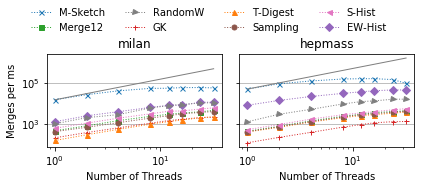

In [351]:
files = [
    "../javamsketch/results/strong_scaling_milan.csv",
    "../javamsketch/results/strong_scaling_hepmass.csv"
]
names = ["milan", "hepmass"]
dft = gen_plots(files, names, "strong_scaling")

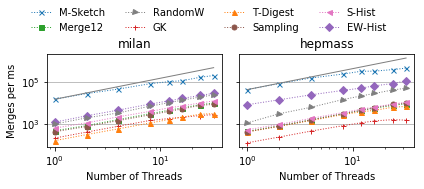

In [352]:
files = [
    "../javamsketch/results/weak_scaling_milan.csv",
    "../javamsketch/results/weak_scaling_hepmass.csv"
]
names = ["milan", "hepmass"]
dft = gen_plots(files, names, "weak_scaling")

# Combining results

In [347]:
results = {
    "strong_scaling_milan": [
        "../javamsketch/results/strong_scaling_milan_1527398600.csv",
        "../javamsketch/results/strong_scaling_milan_1527471725.csv",
        "../javamsketch/results/strong_scaling_milan_1527556077.csv",
        "../javamsketch/results/strong_scaling_milan_1527645296.csv",
        "../javamsketch/results/strong_scaling_milan_1527804272.csv",
        "../javamsketch/results/strong_scaling_milan_g_1527821532.csv",
    ],
    "strong_scaling_hepmass": [
        "../javamsketch/results/strong_scaling_hepmass_1527399188.csv",
        "../javamsketch/results/strong_scaling_hepmass_1527400080.csv",
        "../javamsketch/results/strong_scaling_hepmass_1527404373.csv",
        "../javamsketch/results/strong_scaling_hepmass_1527407320.csv",
        "../javamsketch/results/strong_scaling_hepmass_1527455116.csv",
        "../javamsketch/results/strong_scaling_hepmass_1527646154.csv",
        "../javamsketch/results/strong_scaling_hepmass_1527805109.csv",
        "../javamsketch/results/strong_scaling_hepmass_g_1527821751.csv",
        "../javamsketch/results/strong_scaling_hepmass_g_1527824055.csv"
    ],
    "weak_scaling_milan": [
        "../javamsketch/results/weak_scaling_milan_1527396727.csv",
        "../javamsketch/results/weak_scaling_milan_1527532001.csv",
        "../javamsketch/results/weak_scaling_milan_1527538832.csv",
        "../javamsketch/results/weak_scaling_milan_1527647111.csv",
        "../javamsketch/results/weak_scaling_milan_1527806067.csv",
        "../javamsketch/results/weak_scaling_milan_g_1527821961.csv"
    ],
    "weak_scaling_hepmass": [
        "../javamsketch/results/weak_scaling_hepmass_1527397336.csv",
        "../javamsketch/results/weak_scaling_hepmass_1527409403.csv",
        "../javamsketch/results/weak_scaling_hepmass_1527441681.csv",
        "../javamsketch/results/weak_scaling_hepmass_1527448358.csv",
        "../javamsketch/results/weak_scaling_hepmass_1527649113.csv",
        "../javamsketch/results/weak_scaling_hepmass_g_1527822796.csv",
        "../javamsketch/results/weak_scaling_hepmass_g_1527824883.csv",
        "../javamsketch/results/weak_scaling_hepmass_g_1527829145.csv"
    ]
}

In [350]:
for name, files in results.items():
    df = pd.concat(map(pd.read_csv, files))
    df.to_csv("../javamsketch/results/{}.csv".format(name))